In [157]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [158]:
w=0.7
b=0.3
start=0
end=1
step=0.02

X=torch.arange(start, end, step)
y=w*x+b


In [159]:
#splitting the data into 80:20 ratio
train_split=int(0.8*len(X))
train_split
X_train, y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

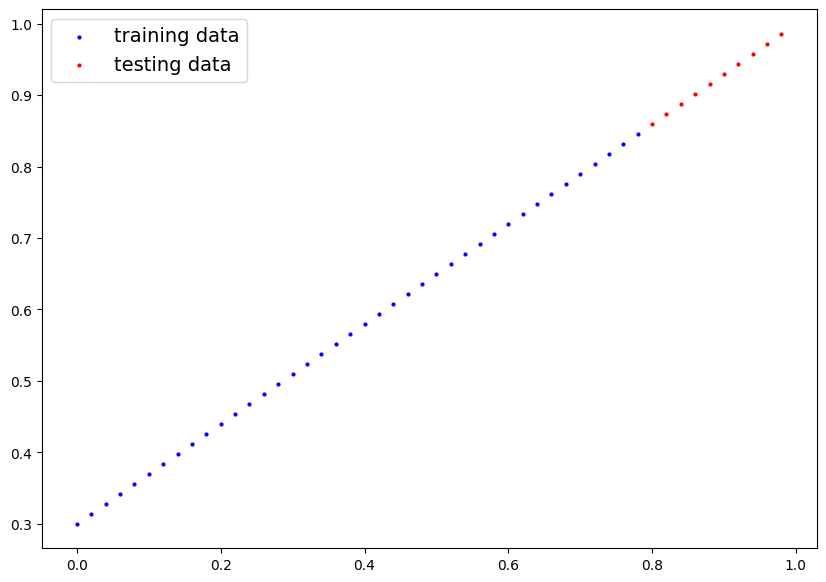

In [160]:
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_label, c="b" ,s=4, label="training data")

  plt.scatter(test_data, test_label, c="r" ,s=4, label="testing data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="g" ,s=4, label="testing data")


  plt.legend(prop={"size":14})


plot_predictions()

In [161]:
#building a model
class linear_regression_model(nn.Module):
  def __init__(self):
    super().__init__()
    self.w=nn.Parameter(torch.randn(1,dtype=torch.float), requires_grad=True)

    self.b=nn.Parameter(torch.randn(1,dtype=torch.float), requires_grad=True)


  def forward(self,x):
    return self.w*x+self.b

In [162]:
#checking the content of the model
torch.manual_seed(42)
model_0=linear_regression_model()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [163]:
model_0.state_dict()

OrderedDict([('w', tensor([0.3367])), ('b', tensor([0.1288]))])

In [164]:
#making predictions through torch.inference_mode
with torch.inference_mode():
  y_pred=model_0(X_test)
  print(y_pred)

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])


In [165]:
print(f"number of testing samples: {len(X_test)}")
print(f"number of predictions samples: {len(y_pred)}")
print(f"predictions: {y_pred}")

number of testing samples: 10
number of predictions samples: 10
predictions: tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])


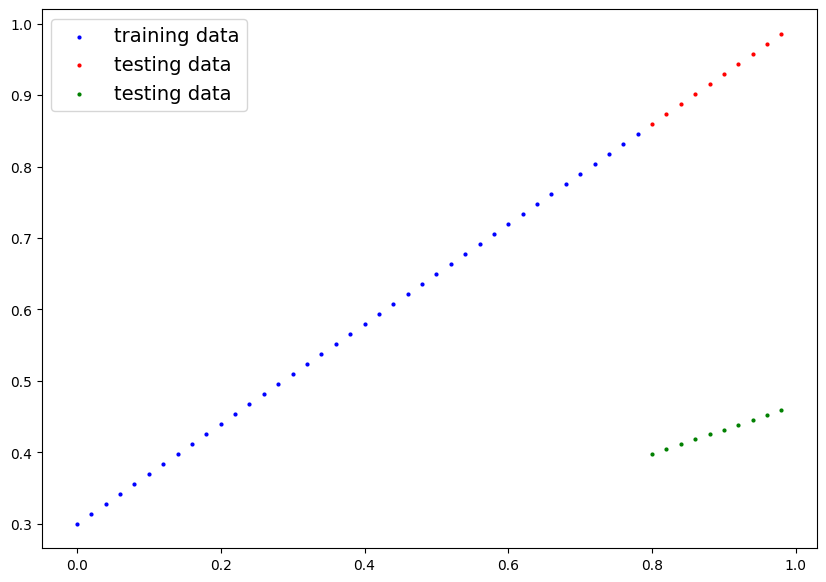

In [166]:
plot_predictions(predictions=y_pred)

In [167]:
#training the model


#creating a loss fn and an optimizer

loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_0.parameters(), lr=0.01)


In [152]:
#creating an optimization loop in pytorch
torch.manual_seed(42)
epochs=10000
#create an empty list to track values
epoch_count=[]
train_loss_values=[]
test_loss_values=[]

for epoch in range(epochs):
  model_0.train()

  #forward pass
  y_pred=model_0(X_train)

  #calculate loss
  loss=loss_fn(y_train,y_pred)

  #optimizer
  optimizer.zero_grad()

  #loss backward
  loss.backward()

  #progressing the optimizer
  optimizer.step()


  ####testing loop
  #putting in evaluation mode
  model_0.eval()
  with torch.inference_mode():
    #forward pass on test data
    test_pred=model_0(X_test)

    #loss fn
    test_loss=loss_fn(test_pred,y_test)

    #printing out whats happening
    if epoch%1000==0:
      epoch_count.append(epoch)
      test_loss_values.append(test_loss.detach().numpy())
      train_loss_values.append(loss.detach().numpy())
      print(f"epoch: {epoch}  |||  MAE train loss: {loss}   ||| MAE test loss: {test_loss}  ")



epoch: 0  |||  MAE train loss: 0.31288138031959534   ||| MAE test loss: 0.48106518387794495  
epoch: 1000  |||  MAE train loss: 0.008932482451200485   ||| MAE test loss: 0.005023092031478882  
epoch: 2000  |||  MAE train loss: 0.008932482451200485   ||| MAE test loss: 0.005023092031478882  
epoch: 3000  |||  MAE train loss: 0.008932482451200485   ||| MAE test loss: 0.005023092031478882  
epoch: 4000  |||  MAE train loss: 0.008932482451200485   ||| MAE test loss: 0.005023092031478882  
epoch: 5000  |||  MAE train loss: 0.008932482451200485   ||| MAE test loss: 0.005023092031478882  
epoch: 6000  |||  MAE train loss: 0.008932482451200485   ||| MAE test loss: 0.005023092031478882  
epoch: 7000  |||  MAE train loss: 0.008932482451200485   ||| MAE test loss: 0.005023092031478882  
epoch: 8000  |||  MAE train loss: 0.008932482451200485   ||| MAE test loss: 0.005023092031478882  
epoch: 9000  |||  MAE train loss: 0.008932482451200485   ||| MAE test loss: 0.005023092031478882  


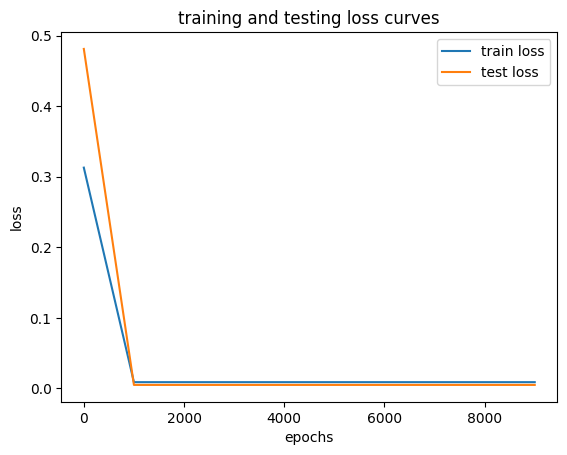

In [153]:
#plotting the loss curves
plt.plot(epoch_count, train_loss_values, label='train loss')

plt.plot(epoch_count, test_loss_values, label='test loss')

plt.title("training and testing loss curves")
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [154]:
#model learned these values
print(model_0.state_dict())

#the real value is
w, b

OrderedDict([('w', tensor([0.6990])), ('b', tensor([0.3093]))])


(0.7, 0.3)

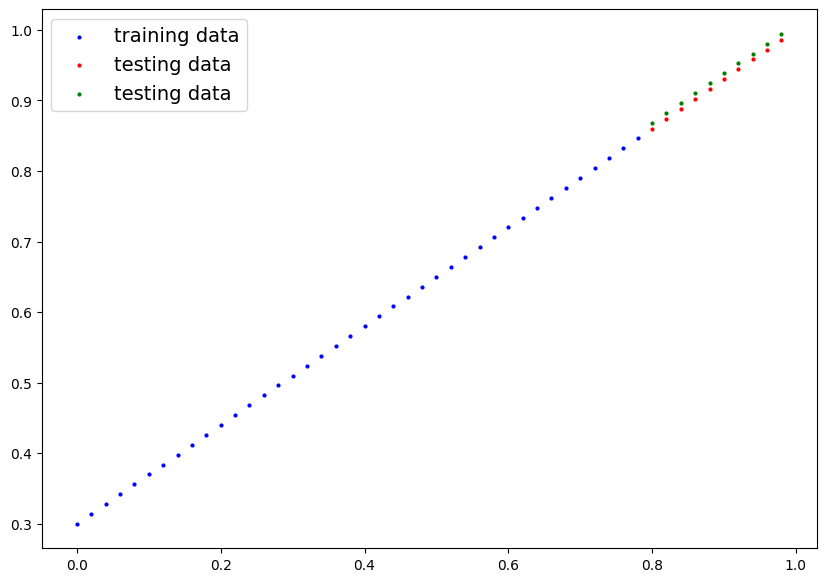

In [155]:
model_0.eval()
with torch.inference_mode():
  y_pred=model_0(X_test)
y_pred

plot_predictions(predictions=y_pred)

In [170]:
#saving the model
from pathlib import Path

#create a models directory
model_path=Path("models")
model_path.mkdir(parents=True, exist_ok=True)

#create a model save path
model_name='first_model.pth'
model_save_path=model_path / model_name

#saving the model state_dict
print(f'saving model to {model_save_path}')
torch.save(obj=model_0.state_dict(),
           f=model_save_path)  #saving only state_dict saves the learned parameters only

print('model saved')

saving model to models/first_model.pth
model saved


In [174]:
#loading the saved model
loaded_model=linear_regression_model()
loaded_model.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

In [175]:
loaded_model.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test)

In [176]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_pred == loaded_model_preds

tensor([True, True, True, True, True, True, True, True, True, True])